# Biomecânica I - gabarito da prova I

> http://demotu.org/ensino/biomecanica-i/

As soluções das questões das provas são apresentadas em Python.  

Primeiro, precisamos importar as bibliotecas necessárias e customizar o ambiente:

## Diurno

### Questão 1 [2 pontos]

** a) [0,5] Equações para posição, velocidade e aceleração da partícula: **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2,
                                                "lines.markersize": 10})
from IPython.display import display, Math
from sympy import Symbol, latex, lambdify, real_roots
from sympy.physics.mechanics import dynamicsymbols

A posição de uma partícula é dada por:

$$ \overrightarrow{\mathbf{r}}(t) = (1 - 4t + 2t^2)\,\hat{\mathbf{i}} + (2t)\,\hat{\mathbf{j}} \quad [m] $$

Calcule para o movimento da marca no intervalo [0, 2] s:  
 a) Equações para posição, velocidade e aceleração da partícula  
 b) Posição, velocidade e aceleração linear mínimas e máximas de cada componente  
 c) Gráficos para posição, velocidade e aceleração linear de cada componente versus o tempo  

**b) [0,5] Posição, velocidade e aceleração linear mínimas e máximas de cada componente:**

In [2]:
# declare the symbolic variables
t = Symbol('t')
# create a Cartesian coordinate system
from sympy.vector import CoordSys3D
O = CoordSys3D('')

# position (given)
r = (1 -4*t + 2*t**2)*O.i + (2*t)*O.j
display(Math(latex('\overrightarrow{\mathbf{r}}(t) = ') + latex(r)))
# velocity
v = r.diff(t, 1)
display(Math(latex('\overrightarrow{\mathbf{v}}(t) = ') + latex(v)))
# acceleration
a = v.diff(t, 1)
display(Math(latex('\overrightarrow{\mathbf{a}}(t) = ') + latex(a)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Em geral, para achar máximos e mínimos de uma função, nós poderíamos calcular sua derivada, igualar à zero e resolver esta equação.
Note que para o presente problema, as derivadas da posição e velocidade já foram calculadas no item anterior. A aceleração tem um valor constante, logo ou pode-se dizer que não há mínimo e máximo ou que o mínimo e máximo é igual a esta constante.

In [3]:
# create functions for calculation of numerical values
ri = lambdify(t, r.dot(O.i), 'numpy')
rj = lambdify(t, r.dot(O.j), 'numpy')
vi = lambdify(t, v.dot(O.i), 'numpy')
vj = lambdify(t, v.dot(O.j), 'numpy')
ai = lambdify(t, a.dot(O.i), 'numpy')
aj = lambdify(t, a.dot(O.j), 'numpy')

In [4]:
print('Posição em i, [mínimo, máximo] em m:')
print('[{0}, {1}]'.format(ri(1), ri(0))) 
print('Posição em j, [mínimo, máximo] em m:')
print('[{0}, {1}]'.format(rj(0), rj(2)))  
print('Velocidade em i, [mínimo, máximo] em m/s:')
print('[{0}, {1}]'.format(vi(0), vi(2))) 
print('Velocidade em j, [mínimo, máximo] em m/s:')
print('[{0}, {1}]'.format(vj(0), vj(2)))  
print('Aceleração em i, [mínimo, máximo] em m/s/s:')
print('[{0}, {1}]'.format(ai(0), ai(2))) 
print('Aceleração em j, [mínimo, máximo] em m/s/s:')
print('[{0}, {1}]'.format(aj(0), aj(2))) 

Posição em i, [mínimo, máximo] em m:
[-1, 1]
Posição em j, [mínimo, máximo] em m:
[0, 4]
Velocidade em i, [mínimo, máximo] em m/s:
[-4, 4]
Velocidade em j, [mínimo, máximo] em m/s:
[2, 2]
Aceleração em i, [mínimo, máximo] em m/s/s:
[4, 4]
Aceleração em j, [mínimo, máximo] em m/s/s:
[0, 0]


**c) [1,0] Gráficos para posição, velocidade e aceleração linear de cada componente versus o tempo:**

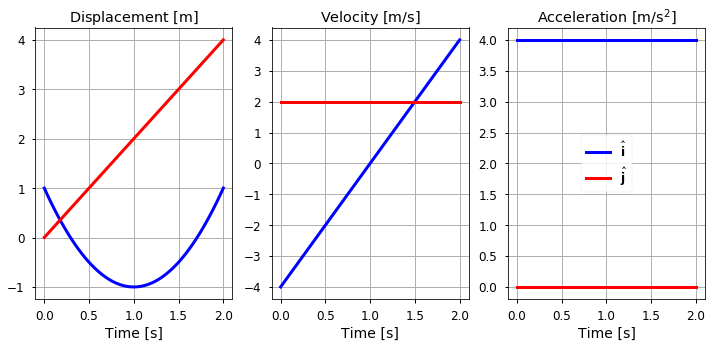

In [5]:
# plots using matplotlib
tn = np.arange(0, 2.02, .02)
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
axs[0].plot(tn, ri(tn), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[0].plot(tn, rj(tn), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[0].set_title('Displacement [$\mathrm{m}$]')
axs[1].plot(tn, vi(tn), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[1].plot(tn, vj(tn)*np.ones(101), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[1].set_title('Velocity [$\mathrm{m/s}$]')
axs[2].plot(tn, ai(tn)*np.ones(101), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[2].plot(tn, aj(tn)*np.ones(101), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{m/s^2}$]')
axs[2].legend(loc = 'center')
for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=14)    
    axi.grid(True)

### Questão 2 [3 pontos]

Considere as seguintes posições de marcas colocadas sobre uma coxa mensuradas por um sistema de captura do movimento: maléolo lateral (ml = [2.92, 10.10, 18.85]), maléolo medial (mm = [2.71, 10.22, 26.52]), cabeça da fíbula (fib = [5.05, 41.90, 15.41]), e côndilo medial da tíbia (tib = [8.29, 41.88, 26.52]). Estas posições estão na ordem x, y, z e são descritas no sistema de coordenadas do laboratório onde x aponta para a frente do sujeito, y aponta para cima e z aponta para o lado. Os centros articulares do tornozelo e joelho estão localizados respectivamente nos centros geométricos entre as marcas ml e mm e entre as marcas fib e tib. Um sistema de coordenadas anatômico para a perna pode ser definido como um eixo quase vertical apontando para cima e passando pelos centros articulares do tornozelo e joelho; outro eixo quase anteroposterior como o produto vetorial do eixo quase vertical e um vetor na direção médio-lateral passando por mm e ml; e o último eixo como o produto vetorial dos dois eixos anteriores, e a origem no centro articular do tornozelo.  
 a. Calcule o sistema de coordenadas anatômico para a perna como descrito acima.  
 b. Demonstre que a base deste sistema de coordenadas é ortonormal.  


**a. [1,5] Calcule o sistema de coordenadas anatômico para a perna como descrito acima:**

In [6]:
ml = np.array([2.92, 10.10, 18.85])
mm = np.array([2.71, 10.22, 26.52])
fib = np.array([5.05, 41.90, 15.41])
tib = np.array([8.29, 41.88, 26.52])

tornoz = (ml + mm)/2
joelho = (fib + tib)/2

v1 = joelho - tornoz        # first axis
v2 = np.cross(v1, mm - ml)  # second axis
v3 = np.cross(v2, v1)       # third axis

# Vector normalization
e1 = v1/np.linalg.norm(v1)
e2 = v2/np.linalg.norm(v2)
e3 = v3/np.linalg.norm(v3)

print('Origem:', '\nO =', tornoz)
print('Versores:', '\ne1 =', e1, '\ne2 =', e2, '\ne3 =', e3)

Origem: 
O = [  2.815  10.16   22.685]
Versores: 
e1 = [ 0.12043275  0.99126617 -0.05373394] 
e2 = [ 0.99246903 -0.11900497  0.02903508] 
e3 = [-0.02238689  0.05682604  0.99813307]


**b. [1,5] Demonstre que a base deste sistema de coordenadas é ortonormal:**

In [7]:
print('\nTest of orthogonality (cross product between versors):',
      '\ne1 x e2:', np.linalg.norm(np.cross(e1, e2)),
      '\ne1 x e3:', np.linalg.norm(np.cross(e1, e3)),
      '\ne2 x e3:', np.linalg.norm(np.cross(e2, e3)))
print('\nNorm of each versor:',
      '\n||e1|| =', np.linalg.norm(e1),
      '\n||e2|| =', np.linalg.norm(e2),
      '\n||e3|| =', np.linalg.norm(e3))


Test of orthogonality (cross product between versors): 
e1 x e2: 1.0 
e1 x e3: 1.0 
e2 x e3: 1.0

Norm of each versor: 
||e1|| = 1.0 
||e2|| = 1.0 
||e3|| = 1.0


### Questão 3 [3 pontos]

Durante um lançamento de disco, a distância entre o disco e o centro de rotação do atleta, antes do disco sair da mão do competidor, segue a seguinte relação:$r = \frac{\theta^2}{2}$ m. Além disso, sabe-se que o atleta rotaciona em torno do próprio eixo com uma velocidade angular $\omega = \frac{t}{3}$ rad/s, e que a altura do disco em relação ao solo varia de acordo com a relação: $h = 0,1t+1$ m.  Considerando isso, pede-se:

	
a) Encontre uma expressão do vetor que caracteriza a posição do disco antes de sair da mão do atleta em função do tempo, utilizando uma base fixa no solo. Deixe claro qual a origem da base que você utilizou. 

b) Encontre a expressão do mesmo vetor  posição utilizando uma base em coordenadas polares fixa na posição do disco.  

c) Encontre a expressão do vetor velocidade na base em coordenadas polares.


d) Encontre a expressão do vetor aceleração na base em coordenadas polares.

e) Esboce a trajetória seguida pelo disco. Esboce, em qualquer ponto da trajetória, os vetores que formam a base em coordenadas polares.

In [8]:
import sympy as sym
from sympy.vector import CoordSys3D, express
sym.init_printing()
from sympy.plotting import plot_parametric, plot3d_parametric_line
from sympy.physics.mechanics import ReferenceFrame, Vector, dot

In [9]:
O = sym.vector.CoordSys3D(' ')

t = sym.symbols('t')
er = sym.symbols('\hat{e}_r')

In [10]:
omega = t/3
theta  = (t**2)/6
h = 0.1*t+1
r = (theta**2)/2

** a. [0,6] Encontre uma expressão do vetor que caracteriza a posição do disco antes de sair da mão do atleta em função do tempo, utilizando uma base fixa no solo. Deixe claro qual a origem da base que você utilizou.   **

In [11]:
s = r*sym.cos(theta)*O.i+r*sym.sin(theta)*O.j+h*O.k
display(Math(latex('\overrightarrow{\mathbf{s}}(t) = ') + latex(s)))

<IPython.core.display.Math object>

Com a origem da base localizada no eixo de rotação do atleta, no solo.

**b. [0,6] Encontre a expressão do mesmo vetor  posição utilizando uma base em coordenadas polares fixa na posição do disco.**

In [12]:
P = O.orient_new_axis(' ', theta, O.k,vector_names=['e_r','e_{}','k'])

In [13]:
#s = r*P.i + h*P.k
display(Math(latex('\overrightarrow{\mathbf{s}}(t) = ') + latex(sym.simplify(express(s,P)))))

<IPython.core.display.Math object>

** c.[0,6] Encontre a expressão do vetor velocidade na base em coordenadas polares.**

In [14]:
v = sym.diff(s,t)
display(Math(latex('\overrightarrow{\mathbf{v}}(t) = ') + latex(sym.simplify(express(v,P)))))

<IPython.core.display.Math object>

** d.[0,6] Encontre a expressão do vetor aceleração na base em coordenadas polares.**

In [15]:
a = sym.diff(v)
display(Math(latex('\overrightarrow{\mathbf{a}}(t) = ') + latex(sym.simplify(express(a,P)))))

<IPython.core.display.Math object>

** e.[0,6] Esboce a trajetória seguida pelo disco. Esboce, em qualquer ponto da trajetória, os vetores que formam a base em coordenadas polares. **

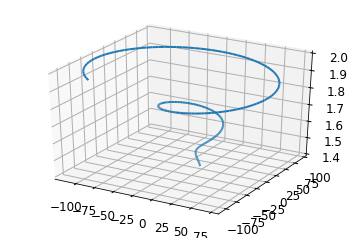

In [16]:
plot3d_parametric_line(s.dot(O.i),s.dot(O.j),s.dot(O.k), (t,4,10))

### Questão 4 [2 pontos]

Na tabela abaixo estãos gravadas as coordenadas do centro de massa durante os saltos em distância de três saltadores. Nesta tabela, a primeira coluna é o número de identificação do saltador, a segunda coluna é o instante em segundos, a terceira é a coordenada X (paralela ao solo) em metros e a quarta coluna é a coordenada Y (ortogonal ao solo) em metros. Considerando isso, pede-se para escrever um pseudocódigo de um programa de computador que execute as seguintes tarefas:

	
a) Dada uma matriz com os valores da tabela, monte uma matriz que contenha as coordenadas X do saltador 2 em uma coluna e as coordenadas Y do mesmo saltador em outra coluna. Além disso, monte um vetor com os instantes correspondentes a cada coordenada.

b) Dada a matriz com as coordenadas X e Y, e o vetor de tempo obtidos no item anterior, obtenha o vetor velocidade do saltador 2 em cada instante.
	
c) Tendo disponíveis as matrizes formadas nos itens anteriores, encontre uma base cuja origem seja a posição do saltador 2 e um dos seus vetores seja tangente à trajetória realizada pelo saltador.

In [17]:
t = np.linspace(0,0.65,20)
r1 = np.transpose(np.array([10*t,-9.81/2*t**2+3.4*t]))
r2 = np.transpose(np.array([11*t,-9.81/2*t**2+3.5*t]))
r3 = np.transpose(np.array([9*t,-9.81/2*t**2+3*t]))
r = np.zeros((3*len(t),4))
for i in range(len(t)):
    r[3*(i):3*(i+1),:] = np.hstack((np.array([[1],[2],[3]]), np.array([[t[i]],[t[i]],[t[i]]]), np.vstack((r1[i,:],r2[i,:],r3[i,:]))))
r

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        ,  0.        ,  0.        ,  0.        ],
       [ 3.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.03421053,  0.34210526,  0.11057517],
       [ 2.        ,  0.03421053,  0.37631579,  0.11399623],
       [ 3.        ,  0.03421053,  0.30789474,  0.09689096],
       [ 1.        ,  0.06842105,  0.68421053,  0.20966911],
       [ 2.        ,  0.06842105,  0.75263158,  0.21651122],
       [ 3.        ,  0.06842105,  0.61578947,  0.18230069],
       [ 1.        ,  0.10263158,  1.02631579,  0.29728182],
       [ 2.        ,  0.10263158,  1.12894737,  0.30754498],
       [ 3.        ,  0.10263158,  0.92368421,  0.25622919],
       [ 1.        ,  0.13684211,  1.36842105,  0.3734133 ],
       [ 2.        ,  0.13684211,  1.50526316,  0.38709751],
       [ 3.        ,  0.13684211,  1.23157895,  0.31867645],
       [ 1.        ,  0.17105263,  1.71052632,  0.43806354],
       [ 2.        ,  0.

** a. [0,5] Dada uma matriz com os valores da tabela, monte uma matriz que contenha as coordenadas X do saltador 2 em uma coluna e as coordenadas Y do mesmo saltador em outra coluna. Além disso, monte um vetor com os instantes correspondentes a cada coordenada.**

In [18]:
P = np.zeros((int(np.size(r,0)/3),2))
time = np.zeros((int(np.size(r,0)/3),1))
k = 0
for i in range(np.size(r,0)):
    if r[i,0] == 2:
        P[k,:] = np.array([r[i,2],r[i,3]])
        time[k] = r[i,1] 
        k += 1
print('P = ' + str(P))
print('t = ' + str(time))

P = [[ 0.          0.        ]
 [ 0.37631579  0.11399623]
 [ 0.75263158  0.21651122]
 [ 1.12894737  0.30754498]
 [ 1.50526316  0.38709751]
 [ 1.88157895  0.4551688 ]
 [ 2.25789474  0.51175886]
 [ 2.63421053  0.55686769]
 [ 3.01052632  0.59049529]
 [ 3.38684211  0.61264166]
 [ 3.76315789  0.62330679]
 [ 4.13947368  0.62249069]
 [ 4.51578947  0.61019335]
 [ 4.89210526  0.58641479]
 [ 5.26842105  0.55115499]
 [ 5.64473684  0.50441395]
 [ 6.02105263  0.44619169]
 [ 6.39736842  0.37648819]
 [ 6.77368421  0.29530346]
 [ 7.15        0.2026375 ]]
t = [[ 0.        ]
 [ 0.03421053]
 [ 0.06842105]
 [ 0.10263158]
 [ 0.13684211]
 [ 0.17105263]
 [ 0.20526316]
 [ 0.23947368]
 [ 0.27368421]
 [ 0.30789474]
 [ 0.34210526]
 [ 0.37631579]
 [ 0.41052632]
 [ 0.44473684]
 [ 0.47894737]
 [ 0.51315789]
 [ 0.54736842]
 [ 0.58157895]
 [ 0.61578947]
 [ 0.65      ]]


** b. [0,5] Dada a matriz com as coordenadas X e Y, e o vetor de tempo obtidos no item anterior, obtenha o vetor velocidade do saltador 2 em cada instante. **

In [19]:
deltaT = time[1] - time[0]
v = np.diff(P,1,0)/deltaT
print('v=' + str(v))

v=[[ 11.           3.33219737]
 [ 11.           2.99659211]
 [ 11.           2.66098684]
 [ 11.           2.32538158]
 [ 11.           1.98977632]
 [ 11.           1.65417105]
 [ 11.           1.31856579]
 [ 11.           0.98296053]
 [ 11.           0.64735526]
 [ 11.           0.31175   ]
 [ 11.          -0.02385526]
 [ 11.          -0.35946053]
 [ 11.          -0.69506579]
 [ 11.          -1.03067105]
 [ 11.          -1.36627632]
 [ 11.          -1.70188158]
 [ 11.          -2.03748684]
 [ 11.          -2.37309211]
 [ 11.          -2.70869737]]


** c.[1,0] Tendo disponíveis as matrizes formadas nos itens anteriores, encontre uma base cuja origem seja a posição do saltador 2 e um dos seus vetores seja tangente à trajetória realizada pelo saltador.**

In [20]:
vNorm = np.sqrt(v[:,0]**2+v[:,1]**2)
et = np.transpose([v[:,0]/vNorm, v[:,1]/vNorm])
print('e_t = ' + str(et))

e_t = [[ 0.95705183  0.28991687]
 [ 0.96483966  0.26283917]
 [ 0.9719649   0.23512598]
 [ 0.97837746  0.20682736]
 [ 0.98403048  0.17800005]
 [ 0.98888128  0.14870716]
 [ 0.99289214  0.1190176 ]
 [ 0.99603114  0.08900539]
 [ 0.9982728   0.05874883]
 [ 0.99959864  0.02832953]
 [ 0.99999765 -0.00216866]
 [ 0.99946649 -0.0326608 ]
 [ 0.99800961 -0.06306203]
 [ 0.99563909 -0.09328876]
 [ 0.99237444 -0.12325979]
 [ 0.98824207 -0.15289736]
 [ 0.98327481 -0.18212813]
 [ 0.9775111  -0.21088399]
 [ 0.97099428 -0.2391027 ]]


In [21]:
det = (np.diff(et,1,0)/deltaT)
C = np.transpose([det[:,0]/vNorm[0:-1], det[:,1]/vNorm[0:-1]])
CNorm = np.sqrt(C[:,0]**2+C[:,1]**2)
en = np.transpose([C[:,0]/CNorm, C[:,1]/CNorm])
print('e_n = ' + str(en))

e_n = [[ 0.27640545 -0.96104112]
 [ 0.24900807 -0.96850141]
 [ 0.22099993 -0.97527382]
 [ 0.19243446 -0.98130983]
 [ 0.16337161 -0.9865646 ]
 [ 0.1338774  -0.9909979 ]
 [ 0.10402334 -0.99457486]
 [ 0.07388561 -0.99726672]
 [ 0.04354423 -0.9990515 ]
 [ 0.01308196 -0.99991443]
 [-0.01741675 -0.99984832]
 [-0.04786696 -0.99885372]
 [-0.07818438 -0.99693892]
 [-0.10828658 -0.99411972]
 [-0.13809403 -0.99041912]
 [-0.16753116 -0.98586678]
 [-0.19652719 -0.98049837]
 [-0.22501694 -0.97435485]]


## Noturno

### Questão 1 [3 pontos]

Considere um sujeito parado em pé com o braço na vertical, ao lado do tronco, e cotovelo flexionado 90 graus fazendo com que o ante-braço fique na horizontal e à frente de seu tronco. A partir desta posição inicial, o sujeito realiza mais uma flexão do cotovelo de 90 graus e para depois de 1 s. A equação de movimento para uma marca na mão do sujeito é:

$$ \overrightarrow{\mathbf{r}}(t) = (0.5 - 5t^3 + 7.5t^4 - 3t^5)\,\hat{\mathbf{i}} + (1.0 + 5t^3 - 7.5t^4 + 3t^5)\,\hat{\mathbf{j}} \quad [m]$$

Onde $\hat{\mathbf{i}}$ e $\hat{\mathbf{j}}$ representam os versores de um sistema de coordenadas cartesianas com sentidos positivos na horizontal para frente e na vertical para cima, respectivamente.

Calcule para o movimento da marca no intervalo [0, 1] s:  
 a) Equações para velocidade e aceleração linear  
 b) Posição, velocidade e aceleração linear mínimas e máximas de cada componente  
 c) Gráficos para posição, velocidade e aceleração linear de cada componente versus o tempo  
 d) Equações para posição, velocidade e aceleração angular do ante-braço  

**a) [0,75] Equações para velocidade e aceleração linear:**

In [22]:
# declare the symbolic variables
t = Symbol('t')
# create a Cartesian coordinate system
from sympy.vector import CoordSys3D
O = CoordSys3D('')

# position (given)
r = (0.5 - 5*t**3 + 7.5*t**4 - 3*t**5)*O.i + (1.0 + 5*t**3 - 7.5*t**4 + 3*t**5)*O.j
display(Math(latex('\overrightarrow{\mathbf{r}}(t) = ') + latex(r)))
# velocity
v = r.diff(t, 1)
display(Math(latex('\overrightarrow{\mathbf{v}}(t) = ') + latex(v)))
# acceleration
a = v.diff(t, 1)
display(Math(latex('\overrightarrow{\mathbf{a}}(t) = ') + latex(a)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**b) [0,75]Posição, velocidade e aceleração linear mínimas e máximas de cada componente:**

Em geral, para achar máximos e mínimos de uma função, nós poderíamos calcular sua derivada, igualar à zero e resolver esta equação.  
Note que para o presente problema, as derivadas da posição e velocidade já foram calculadas no item anterior. Vamos calcular a derivada da aceleração (conhecida como jerk ou solavanco): 

In [23]:
# jerk
jerk = a.diff(t, 1)
display(Math(latex('\overrightarrow{\mathbf{jerk}}(t) = ') + latex(jerk)))

<IPython.core.display.Math object>

- Note que as duas componentes da velocidade, da aceleração e do jerk são iguais a menos do sinal trocado entre elas. Isto quer dizer que o máximo numa das componentes é o mínimo na outra, e vice-versa. Então só precisamos achar mínimos e máximos para uma das componentes.  
- Note que os polinômios para velocidade (grau 4) e para aceleração (grau 3) não possuem termos independentes de $t$ (grau zero), logo $t=0$ é uma raiz (máximo ou mínimo) destes polinômios.  
- Para achar outras raízes, podemos fatorar (dividir) o polinômio para velocidade por $t^2$ e para aceleração por $t$ e resolver os polinômios de segunda ordem (e para achar os máximos e mínimos da aceleração, o polinômio para o jerk também é de segunda ordem!).  

Por inspeção, a raiz do polinômio para velocidade, $15t^2-30t+15=0$, é $t=1s$ e a raiz do polinômio para aceleração, $60t^2-90t+30=0$, é $t=0.5s$.  
As raizes do polinômio para jerk são:

In [24]:
roots = real_roots(jerk.dot(O.j))
print(roots)
roots = [x.evalf() for x in roots]
print(roots)

[-sqrt(3)/6 + 1/2, sqrt(3)/6 + 1/2]
[0.211324865405187, 0.788675134594813]


Substituindo os valores correspondentes nas expressões para posição, velocidade e aceleração:

In [25]:
# create functions for calculation of numerical values
ri = lambdify(t, r.dot(O.i), 'numpy')
rj = lambdify(t, r.dot(O.j), 'numpy')
vi = lambdify(t, v.dot(O.i), 'numpy')
vj = lambdify(t, v.dot(O.j), 'numpy')
ai = lambdify(t, a.dot(O.i), 'numpy')
aj = lambdify(t, a.dot(O.j), 'numpy')

In [26]:
print('Posição horizontal, [mínimo, máximo] em m:')
print('[{0}, {1}]'.format(ri(1), ri(0))) 
print('Posição vertical, [mínimo, máximo] em m:')
print('[{0}, {1}]'.format(rj(0), rj(1)))  
print('Velocidade horizontal, [mínimo, máximo] em m/s:')
print('[{0}, {1}]'.format(vi(.5), vi(0))) 
print('Velocidade vertical, [mínimo, máximo] em m/s:')
print('[{0}, {1}]'.format(vj(0), vj(.5)))  
print('Aceleração horizontal, [mínimo, máximo] em m/s/s:')
print('[{0}, {1}]'.format(ai(roots[0]), ai(roots[1]))) 
print('Aceleração vertical, [mínimo, máximo] em m/s/s:')
print('[{0}, {1}]'.format(aj(roots[1]), aj(roots[0]))) 

Posição horizontal, [mínimo, máximo] em m:
[0.0, 0.5]
Posição vertical, [mínimo, máximo] em m:
[1.0, 1.5]
Velocidade horizontal, [mínimo, máximo] em m/s:
[-0.9375, 0.0]
Velocidade vertical, [mínimo, máximo] em m/s:
[0.0, 0.9375]
Aceleração horizontal, [mínimo, máximo] em m/s/s:
[-2.88675134594813, 2.88675134594813]
Aceleração vertical, [mínimo, máximo] em m/s/s:
[-2.88675134594813, 2.88675134594813]


**c) [0,75]Gráficos para posição, velocidade e aceleração linear de cada componente versus o tempo:**

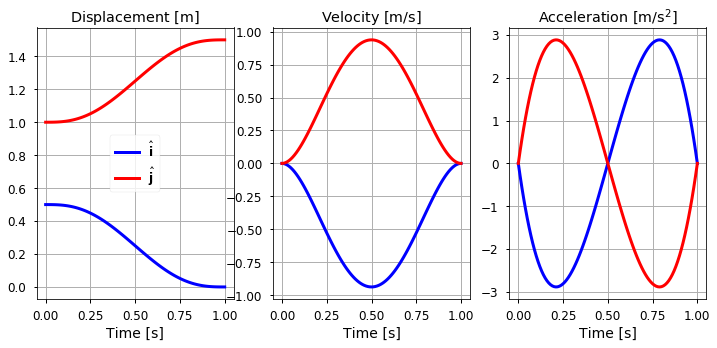

In [27]:
# plots using matplotlib
tn = np.arange(0, 1.01, .01)
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
axs[0].plot(tn, ri(tn), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[0].plot(tn, rj(tn), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[0].set_title('Displacement [$\mathrm{m}$]')
axs[1].plot(tn, vi(tn), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[1].plot(tn, vj(tn), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[1].set_title('Velocity [$\mathrm{m/s}$]')
axs[2].plot(tn, ai(tn), 'b', label='$\hat{\mathbf{i}}$', linewidth=3)
axs[2].plot(tn, aj(tn), 'r', label='$\hat{\mathbf{j}}$', linewidth=3)
axs[2].set_title('Acceleration [$\mathrm{m/s^2}$]')
axs[0].legend(loc = 'center')
for axi in axs:
    axi.set_xlabel('Time [s]', fontsize=14)    
    axi.grid(True)

** d)[0,75] Equações para posição, velocidade e aceleração angular do ante-braço:**

A partir da equação da posição ou do gráfico pode-se inferir que o cotovelo está na posição [0, 1] m e que o comprimento do ante-braço, L, é igual a 0,5 m.  
A partir da posição linear, o ângulo do ante-braço com a horizontal, $\alpha$, pode ser calculado usando a função trigonométrica inversa da tangente ou do seno, por exemplo:

$$ \alpha(t) = \arcsin\left(\frac{1.0 + 5t^3 - 7.5t^4 + 3t^5 - 1}{0.5}\right) $$

In [28]:
angle = dynamicsymbols('alpha')  # it's already alpha(t)

In [29]:
vangle = angle.diff(t, 1)

In [30]:
aangle = vangle.diff(t, 1)

In [31]:
display(Math(latex(r'\dot{\alpha}(t)=') + latex(vangle)))
display(Math(latex(r'\ddot{\alpha}(t)=') + latex(aangle)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

As expressões acima são válidas como resposta, já que calcular a segunda derivada do `arcsin` é trabalhoso.

### Questão 2 [2 pontos]

Considere a situação em que uma bailarina gira em torno do próprio eixo. Nesta situação, a distância entre a mão da bailarina e o seu centro de rotação segue a seguinte relação: $r = \frac{2}{\theta}$ m. Além disso, a bailarina rotaciona em torno do próprio eixo com uma velocidade angular $\omega = \frac{t}{2}$ rad/s, e que a altura da sua mão em relação ao solo se mantém constante em 1,3 m.  Considerando isso, pede-se:

a) Encontre a expressão do vetor  posição da mão da bailarina utilizando uma base em coordenadas polares fixa na posição da mão.  

b) Encontre a expressão do vetor velocidade na base em coordenadas polares.

c) Encontre a expressão do vetor aceleração na base em coordenadas polares.

d) Esboce a trajetória seguida pela mão. Esboce, em qualquer ponto da trajetória, os vetores que formam a base em coordenadas polares.

In [32]:
O = sym.vector.CoordSys3D(' ')

t = sym.symbols('t')
er = sym.symbols('\hat{e}_r')

In [33]:
omega = t/2
theta  = (t**2)/4
h = 1.3
r = 2/theta

** a. [0,5]Encontre a expressão do vetor  posição da mão da bailarina utilizando uma base em coordenadas polares fixa na posição da mão.     **

In [34]:
s = r*sym.cos(theta)*O.i+r*sym.sin(theta)*O.j

In [35]:
P = O.orient_new_axis(' ', theta, O.k,vector_names=['e_r','e_{theta}','k'])

In [36]:
#s = r*P.i + h*P.k
display(Math(latex('\overrightarrow{\mathbf{s}}(t) = ') + latex(sym.simplify(express(s,P)))))

<IPython.core.display.Math object>

** b. [0,5]Encontre a expressão do vetor velocidade na base em coordenadas polares.**

In [37]:
v = sym.diff(s,t)
display(Math(latex('\overrightarrow{\mathbf{v}}(t) = ') + latex(sym.simplify(express(v,P)))))

<IPython.core.display.Math object>

** c.[0,5] Encontre a expressão do vetor aceleração na base em coordenadas polares.**

In [38]:
a = sym.diff(v)
display(Math(latex('\overrightarrow{\mathbf{a}}(t) = ') + latex(sym.simplify(express(a,P)))))

<IPython.core.display.Math object>

** d. [0,5]Esboce a trajetória seguida pela mão. Esboce, em qualquer ponto da trajetória, os vetores que formam a base em coordenadas polares. **

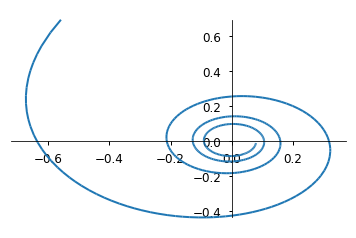

In [39]:
plot_parametric(s.dot(O.i), s.dot(O.j),(t,3,10))

### Questão 3 [3 pontos]

Considere as seguintes posições de marcas colocadas sobre uma coxa mensuradas por um sistema de captura do movimento: epicôndilo lateral (el = [2.92, 10.10, 18.85]) e epicôndilo medial (em = [2.71, 10.22, 26.52]). Além disso, foi estimada a posição da cabeça do trocanter deste fêmur (tr = [5.05, 41.90, 15.41]). Estas posições estão na ordem x, y, z e são descritas no sistema de coordenadas do laboratório onde x aponta para a frente do sujeito, y aponta para cima e z aponta para o lado. O centro articular do joelho está localizado no centro geométrico entre as marcas el e em o centro articular do quadril coincide com a cabeça do trocanter. Um sistema de coordenadas anatômico para a coxa pode ser definido como um eixo quase vertical apontando para cima e passando pelos centros articulares do joelho e do quadril; outro eixo quase anteroposterior apontando para frente como o produto vetorial do eixo quase vertical e um vetor na direção médio-lateral passando por el e em; e o último eixo como o produto vetorial dos dois eixos anteriores, e a origem no centro articular do joelho.  
 a. Calcule o sistema de coordenadas anatômico para a coxa como descrito acima.  
 b. Demonstre que a base deste sistema de coordenadas é ortonormal.  


**a. [1,5] Calcule o sistema de coordenadas anatômico para a coxa como descrito acima:**

In [40]:
el = np.array([2.92, 10.10, 18.85])
em = np.array([2.71, 10.22, 26.52])
tr = np.array([5.05, 41.90, 15.41])

quadri = tr
joelho = (el + em)/2

v1 = quadri - joelho        # first axis
v2 = np.cross(v1, em - el)  # second axis
v3 = np.cross(v2, v1)       # third axis

# Vector normalization
e1 = v1/np.linalg.norm(v1)
e2 = v2/np.linalg.norm(v2)
e3 = v3/np.linalg.norm(v3)

print('Origem:', '\nO =', joelho)
print('Versores:', '\ne1 =', e1, '\ne2 =', e2, '\ne3 =', e3)

Origem: 
O = [  2.815  10.16   22.685]
Versores: 
e1 = [ 0.06847494  0.97243612 -0.22288824] 
e2 = [ 0.99756392 -0.06375548  0.02831018] 
e3 = [-0.0133195   0.22428381  0.97443284]


**b. [1,5]Demonstre que a base deste sistema de coordenadas é ortonormal:**

In [41]:
print('\nTest of orthogonality (cross product between versors):',
      '\ne1 x e2:', np.linalg.norm(np.cross(e1, e2)),
      '\ne1 x e3:', np.linalg.norm(np.cross(e1, e3)),
      '\ne2 x e3:', np.linalg.norm(np.cross(e2, e3)))
print('\nNorm of each versor:',
      '\n||e1|| =', np.linalg.norm(e1),
      '\n||e2|| =', np.linalg.norm(e2),
      '\n||e3|| =', np.linalg.norm(e3))


Test of orthogonality (cross product between versors): 
e1 x e2: 1.0 
e1 x e3: 1.0 
e2 x e3: 1.0

Norm of each versor: 
||e1|| = 1.0 
||e2|| = 1.0 
||e3|| = 1.0


### Questão 4 [2 pontos]

Na tabela abaixo estãos gravadas as coordenadas do centro de massa durante os saltos em distância de três saltadores. Nesta tabela, a primeira coluna é o número de identificação do saltador, a segunda coluna é o instante em segundos, a terceira é a coordenada X (paralela ao solo) em metros e a quarta coluna é a coordenada Y (ortogonal ao solo) em metros. Considerando isso, pede-se para escrever um pseudocódigo de um programa de computador que execute as seguintes tarefas:

	
a) Dada uma matriz com os valores da tabela, monte uma matriz que contenha as coordenadas X do saltador 3 em uma coluna e as coordenadas Y do mesmo saltador em outra coluna. Além disso, monte um vetor com os instantes correspondentes a cada coordenada.

b) Dada a matriz com as coordenadas X e Y, e o vetor de tempo obtidos no item anterior, obtenha o vetor velocidade do saltador 3 em cada instante.
	
c) Tendo disponíveis as matrizes formadas nos itens anteriores, encontre uma base cuja origem seja a posição do saltador 3 e um dos seus vetores seja tangente à trajetória realizada pelo saltador.

In [42]:
t = np.linspace(0,0.65,20)
r1 = np.transpose(np.array([10*t,-9.81/2*t**2+3.4*t]))
r2 = np.transpose(np.array([11*t,-9.81/2*t**2+3.5*t]))
r3 = np.transpose(np.array([9*t,-9.81/2*t**2+3*t]))
r = np.zeros((3*len(t),4))
for i in range(len(t)):
    r[3*(i):3*(i+1),:] = np.hstack((np.array([[1],[2],[3]]), np.array([[t[i]],[t[i]],[t[i]]]), np.vstack((r1[i,:],r2[i,:],r3[i,:]))))
r

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 2.        ,  0.        ,  0.        ,  0.        ],
       [ 3.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.03421053,  0.34210526,  0.11057517],
       [ 2.        ,  0.03421053,  0.37631579,  0.11399623],
       [ 3.        ,  0.03421053,  0.30789474,  0.09689096],
       [ 1.        ,  0.06842105,  0.68421053,  0.20966911],
       [ 2.        ,  0.06842105,  0.75263158,  0.21651122],
       [ 3.        ,  0.06842105,  0.61578947,  0.18230069],
       [ 1.        ,  0.10263158,  1.02631579,  0.29728182],
       [ 2.        ,  0.10263158,  1.12894737,  0.30754498],
       [ 3.        ,  0.10263158,  0.92368421,  0.25622919],
       [ 1.        ,  0.13684211,  1.36842105,  0.3734133 ],
       [ 2.        ,  0.13684211,  1.50526316,  0.38709751],
       [ 3.        ,  0.13684211,  1.23157895,  0.31867645],
       [ 1.        ,  0.17105263,  1.71052632,  0.43806354],
       [ 2.        ,  0.

** a.[0,5]Dada uma matriz com os valores da tabela, monte uma matriz que contenha as coordenadas X do saltador 2 em uma coluna e as coordenadas Y do mesmo saltador em outra coluna. Além disso, monte um vetor com os instantes correspondentes a cada coordenada.**

In [43]:
P = np.zeros((int(np.size(r,0)/3),2))
time = np.zeros((int(np.size(r,0)/3),1))
k = 0
for i in range(np.size(r,0)):
    if r[i,0] == 3:
        P[k,:] = np.array([r[i,2],r[i,3]])
        time[k] = r[i,1] 
        k += 1
print('P = ' + str(P))
print('t = ' + str(time))

P = [[ 0.          0.        ]
 [ 0.30789474  0.09689096]
 [ 0.61578947  0.18230069]
 [ 0.92368421  0.25622919]
 [ 1.23157895  0.31867645]
 [ 1.53947368  0.36964249]
 [ 1.84736842  0.40912729]
 [ 2.15526316  0.43713085]
 [ 2.46315789  0.45365319]
 [ 2.77105263  0.45869429]
 [ 3.07894737  0.45225416]
 [ 3.38684211  0.43433279]
 [ 3.69473684  0.40493019]
 [ 4.00263158  0.36404636]
 [ 4.31052632  0.3116813 ]
 [ 4.61842105  0.24783501]
 [ 4.92631579  0.17250748]
 [ 5.23421053  0.08569872]
 [ 5.54210526 -0.01259127]
 [ 5.85       -0.1223625 ]]
t = [[ 0.        ]
 [ 0.03421053]
 [ 0.06842105]
 [ 0.10263158]
 [ 0.13684211]
 [ 0.17105263]
 [ 0.20526316]
 [ 0.23947368]
 [ 0.27368421]
 [ 0.30789474]
 [ 0.34210526]
 [ 0.37631579]
 [ 0.41052632]
 [ 0.44473684]
 [ 0.47894737]
 [ 0.51315789]
 [ 0.54736842]
 [ 0.58157895]
 [ 0.61578947]
 [ 0.65      ]]


** b. [0,5]Dada a matriz com as coordenadas X e Y, e o vetor de tempo obtidos no item anterior, obtenha o vetor velocidade do saltador 2 em cada instante. **

In [44]:
deltaT = time[1] - time[0]
v = np.diff(P,1,0)/deltaT
print('v=' + str(v))

v=[[ 9.          2.83219737]
 [ 9.          2.49659211]
 [ 9.          2.16098684]
 [ 9.          1.82538158]
 [ 9.          1.48977632]
 [ 9.          1.15417105]
 [ 9.          0.81856579]
 [ 9.          0.48296053]
 [ 9.          0.14735526]
 [ 9.         -0.18825   ]
 [ 9.         -0.52385526]
 [ 9.         -0.85946053]
 [ 9.         -1.19506579]
 [ 9.         -1.53067105]
 [ 9.         -1.86627632]
 [ 9.         -2.20188158]
 [ 9.         -2.53748684]
 [ 9.         -2.87309211]
 [ 9.         -3.20869737]]


** c.[1] Tendo disponíveis as matrizes formadas nos itens anteriores, encontre uma base cuja origem seja a posição do saltador 2 e um dos seus vetores seja tangente à trajetória realizada pelo saltador.**

In [45]:
vNorm = np.sqrt(v[:,0]**2+v[:,1]**2)
et = np.transpose([v[:,0]/vNorm, v[:,1]/vNorm])
print('e_t = ' + str(et))

e_t = [[ 0.95388373  0.30017633]
 [ 0.96361194  0.26730511]
 [ 0.9723631   0.23347376]
 [ 0.98004556  0.19877301]
 [ 0.98657506  0.16330846]
 [ 0.99187715  0.12719954]
 [ 0.99588937  0.09057789]
 [ 0.99856328  0.05358518]
 [ 0.99986599  0.01637061]
 [ 0.99978132 -0.02091209]
 [ 0.99831031 -0.05810779]
 [ 0.99547125 -0.09506314]
 [ 0.99129895 -0.13162972]
 [ 0.9858437  -0.16766693]
 [ 0.9791695  -0.20304454]
 [ 0.97135215 -0.23764471]
 [ 0.9624769  -0.27136361]
 [ 0.95263616 -0.30411238]
 [ 0.94192702 -0.33581764]]


In [46]:
det = (np.diff(et,1,0)/deltaT)
C = np.transpose([det[:,0]/vNorm[0:-1], det[:,1]/vNorm[0:-1]])
CNorm = np.sqrt(C[:,0]**2+C[:,1]**2)
en = np.transpose([C[:,0]/CNorm, C[:,1]/CNorm])
print('e_n = ' + str(en))

e_n = [[ 0.28378241 -0.9588887 ]
 [ 0.25042766 -0.96813531]
 [ 0.21615752 -0.9763585 ]
 [ 0.18107017 -0.98347018]
 [ 0.14527819 -0.98939085]
 [ 0.10890719 -0.99405192]
 [ 0.07209393 -0.99739785]
 [ 0.03498396 -0.99938787]
 [-0.00227113 -0.99999742]
 [-0.03951679 -0.99921891]
 [-0.07659862 -0.99706201]
 [-0.11336562 -0.99355334]
 [-0.14967318 -0.98873552]
 [-0.18538577 -0.98266582]
 [-0.22037929 -0.97541425]
 [-0.25454284 -0.9670615 ]
 [-0.28778006 -0.95769653]
 [-0.32000981 -0.94741423]]
